In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\dell\Desktop\python specialclass\machinelearning\capstoneproject\YourCabs-Capstone.csv')
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,NaN,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,NaN,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,NaN,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [3]:
data.shape

(43431, 19)

In [4]:
df3=data[data.travel_type_id==3]
df3.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,NaN,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,NaN,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,NaN,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,132552,22201,12,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,41275.0,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,132569,15846,12,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,NaN,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


In [5]:
df3['travel_type_id'].value_counts(dropna=False)

3    7550
Name: travel_type_id, dtype: int64

In [6]:
df3=df3.drop('travel_type_id',axis=1)
# Drop all are 3

In [7]:
df3['id'].value_counts().sum()
# All are unique values so drop

7550

In [8]:
df3=df3.drop('id',axis=1)

In [9]:
df3=df3.drop('user_id',axis=1)
# All are personal info so delete this feature too

In [10]:
df3.head()

,vehicle_model_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,65,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,NaN,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,87,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,NaN,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,12,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,NaN,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,12,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,41275.0,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,12,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,NaN,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


In [11]:
a=df3['vehicle_model_id'].mode()[0]
a

12

In [12]:
b=df3['vehicle_model_id'].value_counts()[a]
b

5496

In [13]:
c=(b/df3.shape[0])*100
c

72.79470198675496

In [14]:
# Since 12 appears here for 72%, will create a bias, so drop it
df3=df3.drop('vehicle_model_id',axis=1)

In [15]:
df3.shape

(7550, 15)

In [16]:
df3.head()

,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,NaN,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,NaN,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,NaN,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,41275.0,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,NaN,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


In [17]:
df3['package_id'].value_counts(dropna=False)

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [18]:
df3['to_area_id'].isna().sum()
# All are null values so drop

7550

In [19]:
df3=df3.drop('to_area_id',axis=1)

In [20]:
a=df3['from_city_id'].isna().sum()
a

7102

In [21]:
b=(a/df3.shape[0])*100
b

94.06622516556291

In [22]:
# though from_area_id has so many missing values, yet as this is a categorical column, we can replace the missing values 
# by mode value and keep it, so that we can compute the booking and cancellation percentages for each route. This missing
# value can be taken as a human error, since bookings have been created for each row, and in each row, there has to be 
# value for from_area_id

In [23]:
a=df3['from_area_id'].mode()[0]
a

571.0

In [24]:
b=df3['from_area_id'].value_counts()[a]
b

335

In [25]:
df3['from_area_id'].fillna(a,inplace=True)

In [26]:
df3['from_area_id'].isna().sum()

0

In [27]:
# from_city_id	to_city_id
print(df3['from_city_id'].isna().sum())
print(df3['to_city_id'].isna().sum())

7102
7550


In [28]:
# Since, its travel type id does not refer to point to point travel, and here both have high missing values so drop

In [29]:
df3=df3.drop(['from_city_id','to_city_id'],axis=1)

In [30]:
a=df3['to_date'].isna().sum()
a

2620

In [31]:
b=(a/df3.shape[0])*100
b

34.70198675496688

In [32]:
df3['to_date']=pd.to_datetime(df3['to_date'])
# From Julian date to datetime

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 8 to 43428
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   package_id           7550 non-null   float64       
 1   from_area_id         7550 non-null   float64       
 2   from_date            7550 non-null   object        
 3   to_date              4930 non-null   datetime64[ns]
 4   online_booking       7550 non-null   int64         
 5   mobile_site_booking  7550 non-null   int64         
 6   booking_created      7550 non-null   object        
 7   from_lat             7550 non-null   float64       
 8   from_long            7550 non-null   float64       
 9   to_lat               0 non-null      float64       
 10  to_long              0 non-null      float64       
 11  Car_Cancellation     7550 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 766.8+ KB


In [34]:
df3['to_date']=df3['to_date'].dt.date

In [35]:
df3['to_date'].head()

8            NaT
20           NaT
23           NaT
34    1970-01-01
47           NaT
Name: to_date, dtype: object

In [36]:
df3['to_date']=pd.to_datetime(df3['to_date'])

In [37]:
df3['to_date'].head()

8           NaT
20          NaT
23          NaT
34   1970-01-01
47          NaT
Name: to_date, dtype: datetime64[ns]

In [38]:
print(df3['to_date'].min())
print(df3['to_date'].max())

1970-01-01 00:00:00
1970-01-01 00:00:00


In [39]:
# Since 34% are null values and belongs to 1970s, number of days between 1970 and 2013 wil be huge, hence not reuqired, so drop this
df3=df3.drop('to_date',axis=1)

In [40]:
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


In [41]:
df3['to_lat'].isna().sum()

7550

In [42]:
df3['to_long'].isna().sum()

7550

In [43]:
# Drop to_lat and to_long due to so many null values, and if these are not there hence no point of keeping from_lat and from_long
# also, as without to_lat and to_long we can't compute distance.
df3=df3.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [44]:
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0


In [45]:
df3['from_date']=pd.to_datetime(df3['from_date'])

In [46]:
df3['booking_created']=pd.to_datetime(df3['booking_created'])

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 8 to 43428
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   package_id           7550 non-null   float64       
 1   from_area_id         7550 non-null   float64       
 2   from_date            7550 non-null   datetime64[ns]
 3   online_booking       7550 non-null   int64         
 4   mobile_site_booking  7550 non-null   int64         
 5   booking_created      7550 non-null   datetime64[ns]
 6   Car_Cancellation     7550 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(3)
memory usage: 471.9 KB


In [48]:
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
8,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0
20,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0
23,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0
34,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0
47,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0


In [49]:
df3['from_area_id']=df3['from_area_id'].astype('int')

In [50]:
df3['from_area_id']=df3['from_area_id'].astype('str')

In [51]:
df3['from_area_id'].dtypes

dtype('O')

In [52]:
df3['route']=df3['from_area_id']+'-->'

In [53]:
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route
8,2.0,448,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,448-->
20,2.0,471,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,471-->
23,1.0,1286,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1286-->
34,1.0,1323,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1323-->
47,2.0,142,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,142-->


In [54]:
canc_route_mean=df3.groupby('route').mean()['Car_Cancellation']
canc_route_mean

route
1005-->    0.142857
1008-->    0.200000
1010-->    0.010526
1012-->    0.000000
1013-->    0.500000
             ...   
977-->     0.062500
988-->     0.000000
990-->     0.000000
994-->     0.034483
995-->     0.000000
Name: Car_Cancellation, Length: 482, dtype: float64

In [55]:
df3['canc_route_mean']=df3['route'].map(canc_route_mean)
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route,canc_route_mean
8,2.0,448,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,448-->,0.108696
20,2.0,471,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,471-->,0.111111
23,1.0,1286,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1286-->,0.040000
34,1.0,1323,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1323-->,0.115385
47,2.0,142,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,142-->,0.054545


In [56]:
df3['canc_route_perc']=df3['canc_route_mean']*100
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route,canc_route_mean,canc_route_perc
8,2.0,448,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,448-->,0.108696,10.869565
20,2.0,471,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,471-->,0.111111,11.111111
23,1.0,1286,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1286-->,0.040000,4.000000
34,1.0,1323,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1323-->,0.115385,11.538462
47,2.0,142,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,142-->,0.054545,5.454545


In [57]:
df3=df3.drop('canc_route_mean',axis=1)

In [58]:
df3.describe()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,canc_route_perc
count,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000
mean,2.030066,0.283576,0.026358,0.044503,4.450331
std,1.461756,0.450763,0.160207,0.206224,5.934479
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,2.985075
75%,2.000000,1.000000,0.000000,0.000000,6.849315
max,7.000000,1.000000,1.000000,1.000000,100.000000


In [59]:
# min car cancellation percentage per route is 0%, 25% of the routes have 0% cancellations, 50% of the routes have <=2.985075% cancellations,
# 75% of the routes have 6.849315% cancellations, max is 100%

In [60]:
def cancel(x):
    if x==0:
        return 'Zero'
    elif x<=6.849315:
        return 'Low'
    elif x<=25:
        return 'Medium'
    else:
        return 'High'

In [61]:
df3['Canc_Tags']=df3['canc_route_perc'].apply(cancel)

In [62]:
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route,canc_route_perc,Canc_Tags
8,2.0,448,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,448-->,10.869565,Medium
20,2.0,471,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,471-->,11.111111,Medium
23,1.0,1286,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1286-->,4.000000,Low
34,1.0,1323,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1323-->,11.538462,Medium
47,2.0,142,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,142-->,5.454545,Low


In [63]:
booking_route_perc=(df3.groupby('route').count()['from_area_id']/df3.shape[0])*100
booking_route_perc

route
1005-->    0.092715
1008-->    0.066225
1010-->    2.516556
1012-->    0.039735
1013-->    0.026490
             ...   
977-->     0.423841
988-->     0.291391
990-->     0.039735
994-->     0.384106
995-->     0.066225
Name: from_area_id, Length: 482, dtype: float64

In [64]:
df3['booking_route_perc']=df3['route'].map(booking_route_perc)
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route,canc_route_perc,Canc_Tags,booking_route_perc
8,2.0,448,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,448-->,10.869565,Medium,0.609272
20,2.0,471,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,471-->,11.111111,Medium,0.357616
23,1.0,1286,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1286-->,4.000000,Low,0.331126
34,1.0,1323,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1323-->,11.538462,Medium,0.344371
47,2.0,142,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,142-->,5.454545,Low,1.456954


In [65]:
df3.describe()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,canc_route_perc,booking_route_perc
count,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000,7550.000000
mean,2.030066,0.283576,0.026358,0.044503,4.450331,0.912413
std,1.461756,0.450763,0.160207,0.206224,5.934479,1.124279
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.013245
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.211921
50%,2.000000,0.000000,0.000000,0.000000,2.985075,0.503311
75%,2.000000,1.000000,0.000000,0.000000,6.849315,0.913907
max,7.000000,1.000000,1.000000,1.000000,100.000000,4.437086


In [66]:
# min booking percentage is 0.013245% (that is some routes have this), 25% of the routes have booking percentage <=0.211921%,
# 50% of the routes have booking percentage <=0.503311%, 75% of the routes have booking percentage <=0.913907, max is that
# is some routes have booking percentage of <=4.437086%

In [67]:
def book(x):
    if x<=0.503311:
        return 'Low'
    elif x<=0.913907:
        return 'Medium'
    else:
        return 'High'

In [68]:
df3['Book_Tags']=df3['booking_route_perc'].apply(book)

In [69]:
df3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,route,canc_route_perc,Canc_Tags,booking_route_perc,Book_Tags
8,2.0,448,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,448-->,10.869565,Medium,0.609272,Medium
20,2.0,471,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,471-->,11.111111,Medium,0.357616,Low
23,1.0,1286,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1286-->,4.000000,Low,0.331126,Low
34,1.0,1323,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,1323-->,11.538462,Medium,0.344371,Low
47,2.0,142,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,142-->,5.454545,Low,1.456954,High


In [70]:
# Drop route, from_area_id, and the percentage columns
df3=df3.drop(['from_area_id','route','canc_route_perc','booking_route_perc'],axis=1)

In [71]:
df3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags,Book_Tags
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,Medium,Medium
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,Medium,Low
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,Low,Low
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,Medium,Low
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,Low,High


In [72]:
# Map the tags using label Encoding,as these two features are Ordinal Categorical variables.
df3['Canc_Tags']=df3['Canc_Tags'].map({'Zero':0,'Low':1,'Medium':2,'High':3})
df3['Book_Tags']=df3['Book_Tags'].map({'Low':1,'Medium':2,'High':3})

In [73]:
df3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags,Book_Tags
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,2,2
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,2,1
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,2,1
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,3


In [74]:
print(df3['from_date'].dtypes)
print(df3['booking_created'].dtypes)

datetime64[ns]
datetime64[ns]


In [75]:
df3['DayofWeek']=df3['from_date'].dt.day_name()

In [76]:
df3['Month']=df3['from_date'].dt.month

In [77]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'

In [78]:
df3['Season']=df3['Month'].apply(get_season)

In [79]:
df3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags,Book_Tags,DayofWeek,Month,Season
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,2,2,Tuesday,1,Winter
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,2,1,Tuesday,1,Winter
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,Tuesday,1,Winter
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,2,1,Tuesday,1,Winter
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,3,Wednesday,1,Winter


In [80]:
df3['Weekday/Weekend']=df3['from_date'].dt.dayofweek//5

In [81]:
df3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags,Book_Tags,DayofWeek,Month,Season,Weekday/Weekend
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,2,2,Tuesday,1,Winter,0
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,2,1,Tuesday,1,Winter,0
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,Tuesday,1,Winter,0
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,2,1,Tuesday,1,Winter,0
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,3,Wednesday,1,Winter,0


In [82]:
def time(hour):
    if hour>=6 and hour<12:
        return 'Morning'
    elif hour>=12 and hour<18:
        return 'Afternoon'
    elif hour>=18 and hour<24:
        return 'Evening'
    else:
        return 'Night'

In [83]:
df3['TimeofDay']=df3['from_date'].dt.hour.apply(time)

In [84]:
df3['Book_DayofWeek']=df3['booking_created'].dt.day_name()

In [85]:
df3['Book_Month']=df3['booking_created'].dt.month

In [86]:
def get_season1(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'

In [87]:
df3['Book_Season']=df3['Book_Month'].apply(get_season1)

In [88]:
df3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags,Book_Tags,DayofWeek,Month,Season,Weekday/Weekend,TimeofDay,Book_DayofWeek,Book_Month,Book_Season
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,2,2,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,2,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,2,1,Tuesday,1,Winter,0,Evening,Tuesday,1,Winter
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,3,Wednesday,1,Winter,0,Night,Tuesday,1,Winter


In [89]:
df3['book_Weekday/Weekend']=df3['booking_created'].dt.dayofweek//5

In [90]:
def time1(hour):
    if hour>=6 and hour<12:
        return 'Morning'
    elif hour>=12 and hour<18:
        return 'Afternoon'
    elif hour>=18 and hour<24:
        return 'Evening'
    else:
        return 'Night'

In [91]:
df3['Book_TimeofDay']=df3['booking_created'].dt.hour.apply(time1)

In [92]:
df3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags,Book_Tags,DayofWeek,Month,Season,Weekday/Weekend,TimeofDay,Book_DayofWeek,Book_Month,Book_Season,book_Weekday/Weekend,Book_TimeofDay
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,2,2,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Morning
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,2,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Afternoon
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Afternoon
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,2,1,Tuesday,1,Winter,0,Evening,Tuesday,1,Winter,0,Afternoon
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,3,Wednesday,1,Winter,0,Night,Tuesday,1,Winter,0,Evening


In [93]:
df3['Time_Gap_hours']=(df3['from_date']-df3['booking_created']).dt.total_seconds()/3600

In [94]:
df3.head()

,package_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Canc_Tags,Book_Tags,DayofWeek,Month,Season,Weekday/Weekend,TimeofDay,Book_DayofWeek,Book_Month,Book_Season,book_Weekday/Weekend,Book_TimeofDay,Time_Gap_hours
8,2.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,2,2,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Morning,6.266667
20,2.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,2,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Afternoon,1.633333
23,1.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,1,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Afternoon,1.850000
34,1.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,2,1,Tuesday,1,Winter,0,Evening,Tuesday,1,Winter,0,Afternoon,2.583333
47,2.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,1,3,Wednesday,1,Winter,0,Night,Tuesday,1,Winter,0,Evening,7.383333


In [95]:
# Now drop the two columns:

In [96]:
df3=df3.drop(['from_date','booking_created'],axis=1)

In [97]:
df3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,Canc_Tags,Book_Tags,DayofWeek,Month,Season,Weekday/Weekend,TimeofDay,Book_DayofWeek,Book_Month,Book_Season,book_Weekday/Weekend,Book_TimeofDay,Time_Gap_hours
8,2.0,0,0,0,2,2,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Morning,6.266667
20,2.0,0,0,0,2,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Afternoon,1.633333
23,1.0,0,0,0,1,1,Tuesday,1,Winter,0,Afternoon,Tuesday,1,Winter,0,Afternoon,1.850000
34,1.0,1,0,0,2,1,Tuesday,1,Winter,0,Evening,Tuesday,1,Winter,0,Afternoon,2.583333
47,2.0,0,0,0,1,3,Wednesday,1,Winter,0,Night,Tuesday,1,Winter,0,Evening,7.383333


In [98]:
# Apply one hot encoding on the following features, since they are Nominal Categorical Variables.
DayofWeek_Encoded=pd.get_dummies(df3['DayofWeek'],prefix='day')
df3=pd.concat((df3,DayofWeek_Encoded),axis=1)
df3=df3.drop('DayofWeek',axis=1)

In [99]:
TimeofDay_Encoded=pd.get_dummies(df3['TimeofDay'],prefix='time')
df3=pd.concat((df3,TimeofDay_Encoded),axis=1)
df3=df3.drop('TimeofDay',axis=1)

In [100]:
Book_DayofWeek_Encoded=pd.get_dummies(df3['Book_DayofWeek'],prefix='bookday')
df3=pd.concat((df3,Book_DayofWeek_Encoded),axis=1)
df3=df3.drop('Book_DayofWeek',axis=1)

In [101]:
Book_TimeofDay_Encoded=pd.get_dummies(df3['Book_TimeofDay'],prefix='booktime')
df3=pd.concat((df3,Book_TimeofDay_Encoded),axis=1)
df3=df3.drop('Book_TimeofDay',axis=1)

In [102]:
DayofWeek_Encoded

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
8,0,0,0,0,0,1,0
20,0,0,0,0,0,1,0
23,0,0,0,0,0,1,0
34,0,0,0,0,0,1,0
47,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
43415,0,0,0,1,0,0,0
43417,0,0,0,1,0,0,0
43420,0,1,0,0,0,0,0
43424,0,0,0,1,0,0,0


In [103]:
df3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,Canc_Tags,Book_Tags,Month,Season,Weekday/Weekend,Book_Month,...,bookday_Monday,bookday_Saturday,bookday_Sunday,bookday_Thursday,bookday_Tuesday,bookday_Wednesday,booktime_Afternoon,booktime_Evening,booktime_Morning,booktime_Night
8,2.0,0,0,0,2,2,1,Winter,0,1,...,0,0,0,0,1,0,0,0,1,0
20,2.0,0,0,0,2,1,1,Winter,0,1,...,0,0,0,0,1,0,1,0,0,0
23,1.0,0,0,0,1,1,1,Winter,0,1,...,0,0,0,0,1,0,1,0,0,0
34,1.0,1,0,0,2,1,1,Winter,0,1,...,0,0,0,0,1,0,1,0,0,0
47,2.0,0,0,0,1,3,1,Winter,0,1,...,0,0,0,0,1,0,0,1,0,0


In [104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 8 to 43428
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   package_id            7550 non-null   float64
 1   online_booking        7550 non-null   int64  
 2   mobile_site_booking   7550 non-null   int64  
 3   Car_Cancellation      7550 non-null   int64  
 4   Canc_Tags             7550 non-null   int64  
 5   Book_Tags             7550 non-null   int64  
 6   Month                 7550 non-null   int64  
 7   Season                7550 non-null   object 
 8   Weekday/Weekend       7550 non-null   int64  
 9   Book_Month            7550 non-null   int64  
 10  Book_Season           7550 non-null   object 
 11  book_Weekday/Weekend  7550 non-null   int64  
 12  Time_Gap_hours        7550 non-null   float64
 13  day_Friday            7550 non-null   uint8  
 14  day_Monday            7550 non-null   uint8  
 15  day_Saturday        

In [105]:
df3.columns

Index(['package_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'Canc_Tags', 'Book_Tags', 'Month', 'Season',
       'Weekday/Weekend', 'Book_Month', 'Book_Season', 'book_Weekday/Weekend',
       'Time_Gap_hours', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'time_Afternoon', 'time_Evening', 'time_Morning', 'time_Night',
       'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Afternoon', 'booktime_Evening',
       'booktime_Morning', 'booktime_Night'],
      dtype='object')

In [106]:
data_subset=df3[['day_Friday','day_Monday','day_Saturday','day_Sunday','day_Thursday','day_Tuesday','day_Wednesday',
                'bookday_Friday','bookday_Monday','bookday_Saturday','bookday_Sunday','bookday_Thursday','bookday_Tuesday','bookday_Wednesday',
                'Car_Cancellation']]

In [107]:
corr_matrix=data_subset.corr()

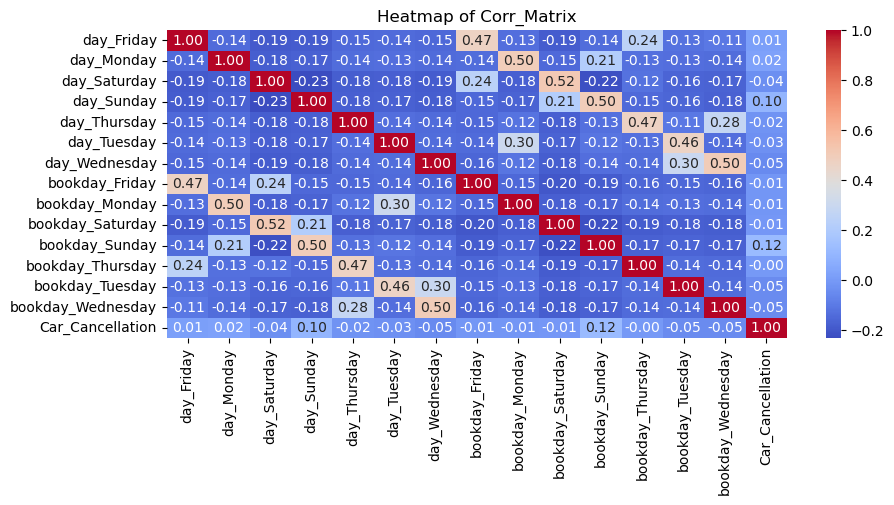

In [108]:
plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap of Corr_Matrix')
plt.show()

In [109]:
# Now, apply one hot encoding on Season and Book_Season, since they are not in any order or ranking, so Nominal categorical variables.

In [110]:
Season_Encoded=pd.get_dummies(df3['Season'],prefix='Season')
df3=pd.concat((df3,Season_Encoded),axis=1)
df3=df3.drop('Season',axis=1)

In [111]:
Book_Season_Encoded=pd.get_dummies(df3['Book_Season'],prefix='BookSeason')
df3=pd.concat((df3,Book_Season_Encoded),axis=1)
df3=df3.drop('Book_Season',axis=1)

In [112]:
df3.columns

Index(['package_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'Canc_Tags', 'Book_Tags', 'Month',
       'Weekday/Weekend', 'Book_Month', 'book_Weekday/Weekend',
       'Time_Gap_hours', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'time_Afternoon', 'time_Evening', 'time_Morning', 'time_Night',
       'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Afternoon', 'booktime_Evening',
       'booktime_Morning', 'booktime_Night', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'BookSeason_Fall',
       'BookSeason_Spring', 'BookSeason_Summer', 'BookSeason_Winter'],
      dtype='object')

In [113]:
data_subset=df3[['Month','Weekday/Weekend','Book_Month','book_Weekday/Weekend','Car_Cancellation']]

In [114]:
corr_matrix1=data_subset.corr()
corr_matrix1

,Month,Weekday/Weekend,Book_Month,book_Weekday/Weekend,Car_Cancellation
Month,1.000000,-0.052151,0.998765,-0.011666,0.101309
Weekday/Weekend,-0.052151,1.000000,-0.052111,0.653769,0.048808
Book_Month,0.998765,-0.052111,1.000000,-0.010069,0.101925
book_Weekday/Weekend,-0.011666,0.653769,-0.010069,1.000000,0.086833
Car_Cancellation,0.101309,0.048808,0.101925,0.086833,1.000000


In [115]:
print(df3['Month'].unique())
print(df3['Book_Month'].unique())
print(df3['Weekday/Weekend'].unique())
print(df3['book_Weekday/Weekend'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  4  5  6  7  8  9 10 11]
[0 1]
[0 1]


In [116]:
# Since, these features too have very low correlation with the target variable, and will contribute very very less to the
# to the predicive power, hence to reduce noise and improve efficiency we must drop them.
df3=df3.drop(['Month','Weekday/Weekend'],axis=1)

In [117]:
df3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,Canc_Tags,Book_Tags,Book_Month,book_Weekday/Weekend,Time_Gap_hours,day_Friday,...,booktime_Morning,booktime_Night,Season_Fall,Season_Spring,Season_Summer,Season_Winter,BookSeason_Fall,BookSeason_Spring,BookSeason_Summer,BookSeason_Winter
8,2.0,0,0,0,2,2,1,0,6.266667,0,...,1,0,0,0,0,1,0,0,0,1
20,2.0,0,0,0,2,1,1,0,1.633333,0,...,0,0,0,0,0,1,0,0,0,1
23,1.0,0,0,0,1,1,1,0,1.850000,0,...,0,0,0,0,0,1,0,0,0,1
34,1.0,1,0,0,2,1,1,0,2.583333,0,...,0,0,0,0,0,1,0,0,0,1
47,2.0,0,0,0,1,3,1,0,7.383333,0,...,0,0,0,0,0,1,0,0,0,1


In [118]:
df3.columns

Index(['package_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'Canc_Tags', 'Book_Tags', 'Book_Month',
       'book_Weekday/Weekend', 'Time_Gap_hours', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'time_Afternoon', 'time_Evening', 'time_Morning',
       'time_Night', 'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Afternoon', 'booktime_Evening',
       'booktime_Morning', 'booktime_Night', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'BookSeason_Fall',
       'BookSeason_Spring', 'BookSeason_Summer', 'BookSeason_Winter'],
      dtype='object')

In [119]:
data_subset=df3[['time_Afternoon', 'time_Evening', 'time_Morning', 'time_Night',
       'booktime_Afternoon', 'booktime_Evening', 'booktime_Morning',
       'booktime_Night','Car_Cancellation']]

In [120]:
corr_matrix2=data_subset.corr()

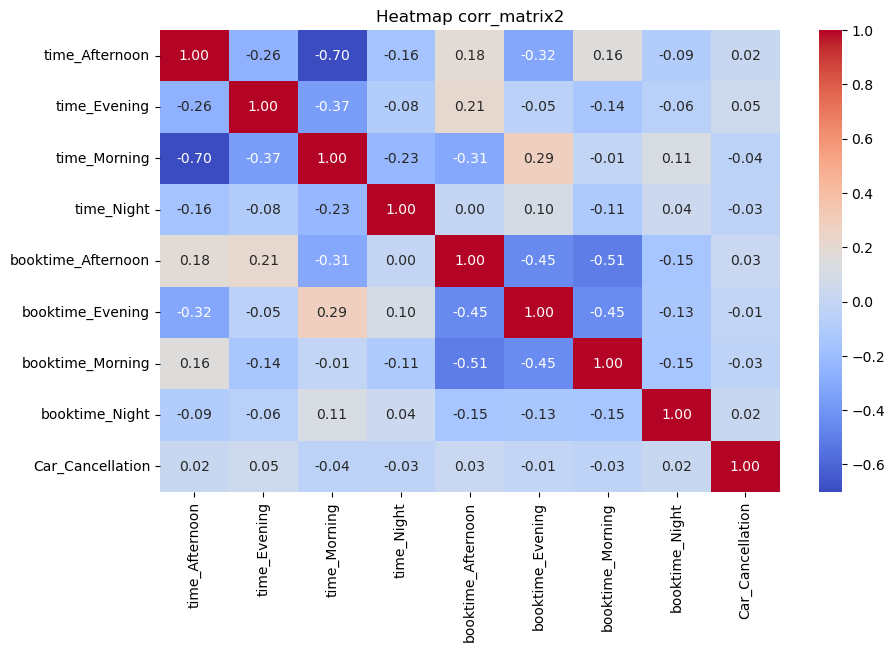

In [121]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix2,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap corr_matrix2')
plt.show()

In [122]:
df3=df3.drop('time_Morning',axis=1)

In [123]:
data_subset=df3[['Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'BookSeason_Fall', 'BookSeason_Spring', 'BookSeason_Summer',
       'BookSeason_Winter','Car_Cancellation']]

In [124]:
corr_matrix3=data_subset.corr()

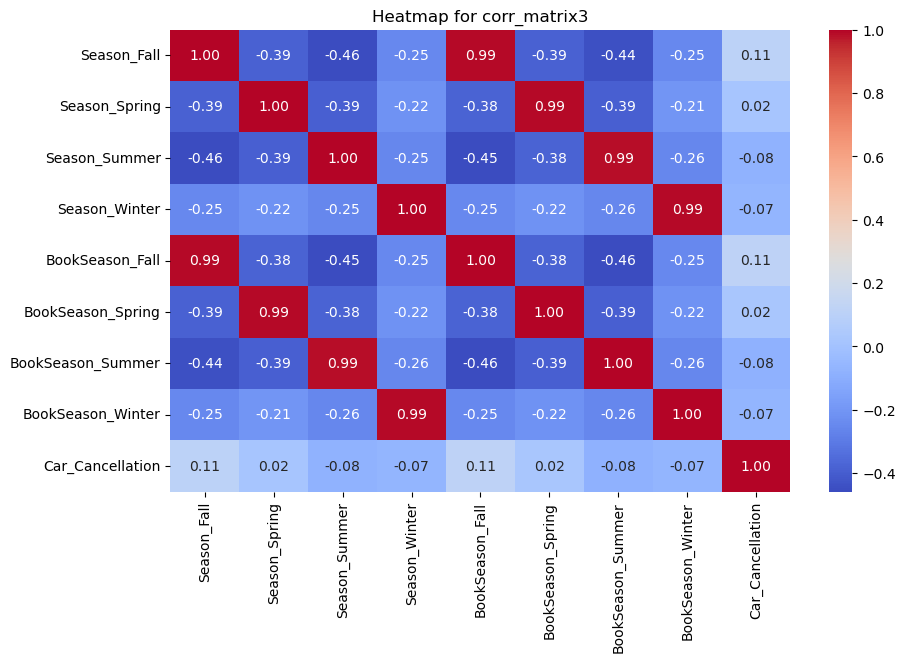

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix3,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap for corr_matrix3')
plt.show()

In [126]:
# Now, here, Season_Fall has very high correlation with BookSeason_Fall, Season_Spring has very high correlation with 
# BookSeason_Spring, Season_Summer has very high correlation with BookSeason_Summer, Season_Winter has very high correlation
# with BookSeason_Winter so drop them.
df3=df3.drop(['BookSeason_Fall','BookSeason_Spring','BookSeason_Summer','BookSeason_Winter'],axis=1)

In [127]:
data_subset=df3[['Season_Fall','Season_Spring','Season_Summer','Season_Winter','Car_Cancellation']]

In [128]:
corr_matrix5=data_subset.corr()

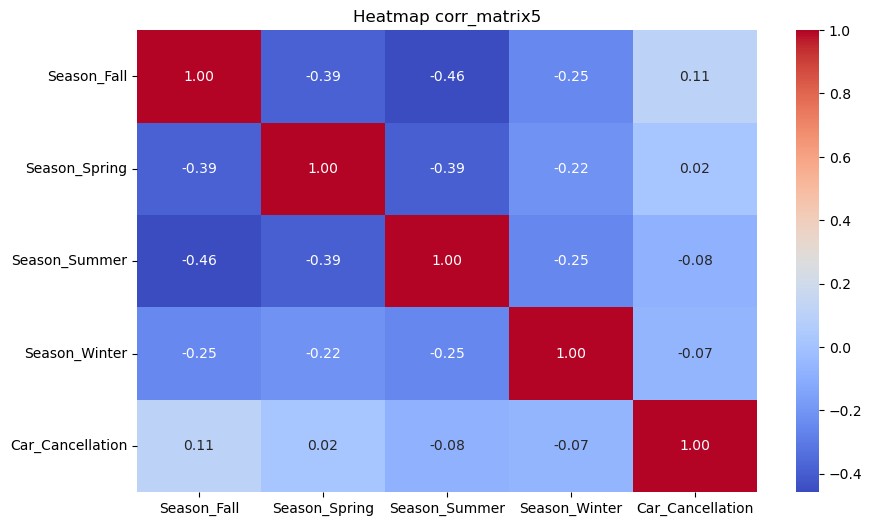

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix5,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap corr_matrix5')
plt.show()

In [130]:
data_subset=df3[['package_id', 'online_booking', 'mobile_site_booking','Car_Cancellation']]

In [131]:
corr_matrix4=data_subset.corr()

In [132]:
corr_matrix4

,package_id,online_booking,mobile_site_booking,Car_Cancellation
package_id,1.000000,-0.022390,-0.029405,0.071583
online_booking,-0.022390,1.000000,-0.103515,0.143526
mobile_site_booking,-0.029405,-0.103515,1.000000,0.040672
Car_Cancellation,0.071583,0.143526,0.040672,1.000000


In [133]:
df3['package_id'].value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [134]:
#df3=df3.drop('package_id',axis=1)

In [135]:
data_subset=df3[['Canc_Tags','Book_Tags','Car_Cancellation']]
corr_matrix=data_subset.corr()
corr_matrix

,Canc_Tags,Book_Tags,Car_Cancellation
Canc_Tags,1.000000,0.196448,0.229102
Book_Tags,0.196448,1.000000,-0.010838
Car_Cancellation,0.229102,-0.010838,1.000000


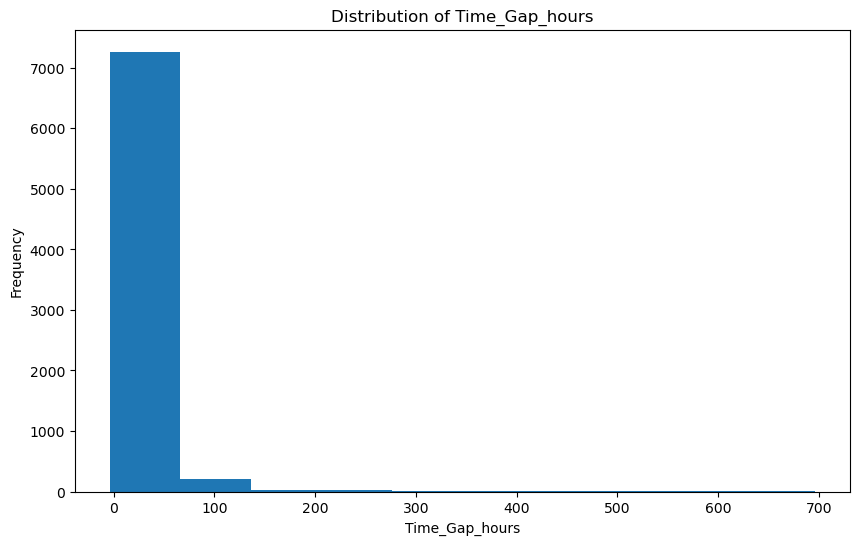

In [136]:
plt.figure(figsize=(10,6))
plt.hist(df3['Time_Gap_hours'])
plt.xlabel('Time_Gap_hours')
plt.ylabel('Frequency')
plt.title('Distribution of Time_Gap_hours')
plt.show()

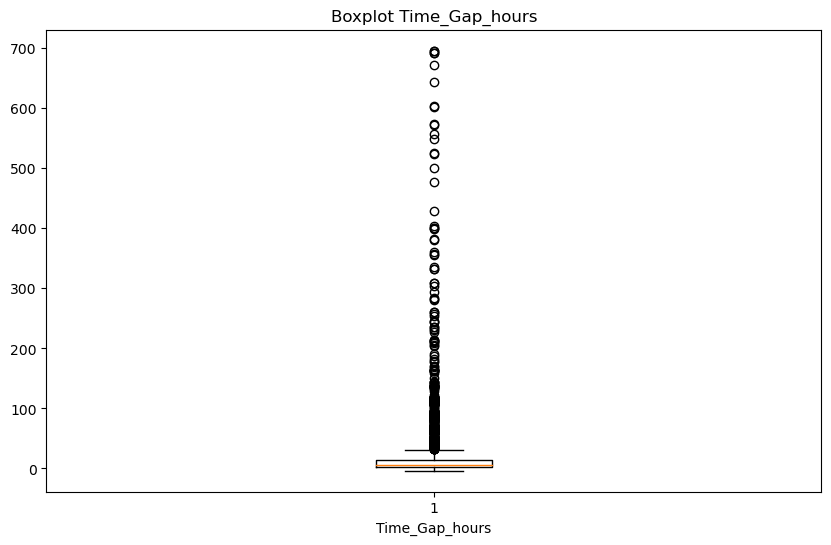

In [137]:
plt.figure(figsize=(10,6))
plt.boxplot(df3['Time_Gap_hours'])
plt.xlabel('Time_Gap_hours')
plt.title('Boxplot Time_Gap_hours')
plt.show()

In [138]:
df3.isna().sum()

package_id              0
online_booking          0
mobile_site_booking     0
Car_Cancellation        0
Canc_Tags               0
Book_Tags               0
Book_Month              0
book_Weekday/Weekend    0
Time_Gap_hours          0
day_Friday              0
day_Monday              0
day_Saturday            0
day_Sunday              0
day_Thursday            0
day_Tuesday             0
day_Wednesday           0
time_Afternoon          0
time_Evening            0
time_Night              0
bookday_Friday          0
bookday_Monday          0
bookday_Saturday        0
bookday_Sunday          0
bookday_Thursday        0
bookday_Tuesday         0
bookday_Wednesday       0
booktime_Afternoon      0
booktime_Evening        0
booktime_Morning        0
booktime_Night          0
Season_Fall             0
Season_Spring           0
Season_Summer           0
Season_Winter           0
dtype: int64

In [139]:
print(df3['Time_Gap_hours'].min())
print(df3['Time_Gap_hours'].max())

-3.55
695.55


In [140]:
df3['Time_Gap_hours']=df3['Time_Gap_hours'].abs()

In [141]:
df3_new=df3
df3_new.shape

(7550, 34)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [143]:
X=df3_new.drop('Car_Cancellation',axis=1)
Y=df3_new['Car_Cancellation']

In [144]:
X.shape

(7550, 33)

In [145]:
Y.shape

(7550,)

In [146]:
Y.value_counts()

0    7214
1     336
Name: Car_Cancellation, dtype: int64

In [147]:
df3.columns

Index(['package_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'Canc_Tags', 'Book_Tags', 'Book_Month',
       'book_Weekday/Weekend', 'Time_Gap_hours', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'time_Afternoon', 'time_Evening', 'time_Night',
       'bookday_Friday', 'bookday_Monday', 'bookday_Saturday',
       'bookday_Sunday', 'bookday_Thursday', 'bookday_Tuesday',
       'bookday_Wednesday', 'booktime_Afternoon', 'booktime_Evening',
       'booktime_Morning', 'booktime_Night', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [148]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=111)

In [149]:
mms=RobustScaler()

In [150]:
continous_feature=['Time_Gap_hours']

In [151]:
X_train[continous_feature]=mms.fit_transform(X_train[continous_feature])

In [152]:
X_test[continous_feature]=mms.transform(X_test[continous_feature])

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score,average_precision_score

In [154]:
model_logreg=LogisticRegression()

In [155]:
model_logreg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
Y_pred=model_logreg.predict(X_test)

In [157]:
Y_pred_proba=model_logreg.predict_proba(X_test)[:,1]

In [158]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1443
           1       0.50      0.09      0.15        67

    accuracy                           0.96      1510
   macro avg       0.73      0.54      0.56      1510
weighted avg       0.94      0.96      0.94      1510



In [159]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.2969771926672989


In [160]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9556291390728476


In [161]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.8837620628665405


In [162]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=111)

In [163]:
X_train_resampled,Y_train_resampled=smote.fit_resample(X_train,Y_train)

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
model=RandomForestClassifier()

In [166]:
model.fit(X_train_resampled,Y_train_resampled)

RandomForestClassifier()

In [167]:
Y_pred=model.predict(X_test)

In [168]:
Y_pred_proba=model.predict_proba(X_test)[:,1] # Probabilities for positive class

In [169]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1443
           1       0.32      0.33      0.32        67

    accuracy                           0.94      1510
   macro avg       0.64      0.65      0.65      1510
weighted avg       0.94      0.94      0.94      1510



In [170]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.2544758514854415


In [171]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9390728476821192


In [172]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.8694262574859589


In [173]:
import xgboost as xgb

In [174]:
model_xgb=xgb.XGBClassifier()

In [175]:
model_xgb.fit(X_train_resampled,Y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [176]:
Y_pred=model_xgb.predict(X_test)

In [177]:
Y_pred_proba=model_xgb.predict_proba(X_test)[:,1]

In [178]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1443
           1       0.34      0.42      0.37        67

    accuracy                           0.94      1510
   macro avg       0.66      0.69      0.67      1510
weighted avg       0.94      0.94      0.94      1510



In [179]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.3112758985943946


In [180]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.937748344370861


In [181]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.8850342880193626


In [182]:
from sklearn.svm import SVC

In [183]:
svm_model=SVC(kernel='rbf',C=1.0,gamma='scale',probability=True,random_state=111)

In [184]:
svm_model.fit(X_train_resampled,Y_train_resampled)

SVC(probability=True, random_state=111)

In [185]:
Y_pred=svm_model.predict(X_test)

In [186]:
Y_pred_proba=svm_model.predict_proba(X_test)[:,1]

In [187]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1443
           1       0.19      0.58      0.29        67

    accuracy                           0.87      1510
   macro avg       0.58      0.73      0.61      1510
weighted avg       0.94      0.87      0.90      1510



In [188]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.2832849320831378


In [189]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.871523178807947


In [190]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.8538285702464807


In [191]:
from sklearn.naive_bayes import GaussianNB

In [192]:
model_gnb=GaussianNB()

In [193]:
model_gnb.fit(X_train_resampled,Y_train_resampled)

GaussianNB()

In [194]:
Y_pred=model_gnb.predict(X_test)

In [195]:
Y_pred_proba=model_gnb.predict_proba(X_test)[:,1]

In [196]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.57      0.72      1443
           1       0.07      0.72      0.13        67

    accuracy                           0.58      1510
   macro avg       0.53      0.65      0.43      1510
weighted avg       0.94      0.58      0.70      1510



In [197]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.17556791316419681


In [198]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.580794701986755


In [199]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.7103774267953372


In [200]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [201]:
model_xgb=xgb.XGBClassifier()

In [202]:
param_grid={
    'n_estimators':[30,200,500],
    'max_depth':[5,20,30],
    'learning_rate':[0.01,0.3],
    'subsample':[0.5,1.0],
    'colsample_bytree':[0.5,1.0]
}

In [203]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=111)

In [204]:
grid_search=GridSearchCV(estimator=model_xgb,param_grid=param_grid,cv=cv,n_jobs=-1,verbose=2,scoring='average_precision')

In [205]:
grid_search.fit(X_train_resampled,Y_train_resampled)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=111, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_ty...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=Non

In [206]:
best_model_xgb=grid_search.best_estimator_
print("Best hyperparameters are:",grid_search.best_params_)

Best hyperparameters are: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 30, 'n_estimators': 200, 'subsample': 1.0}


In [207]:
Y_pred=best_model_xgb.predict(X_test)

In [208]:
Y_pred_proba=best_model_xgb.predict_proba(X_test)[:,1]

In [209]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1443
           1       0.36      0.43      0.39        67

    accuracy                           0.94      1510
   macro avg       0.67      0.70      0.68      1510
weighted avg       0.95      0.94      0.94      1510



In [210]:
average_precision=average_precision_score(Y_test,Y_pred_proba)
print(average_precision)

0.29402442672866375


In [211]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9403973509933775


In [212]:
roc_auc=roc_auc_score(Y_test,Y_pred_proba)
print(roc_auc)

0.878114624383281
